In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from PIL import ImageGrab
from scipy import stats

# Question 2

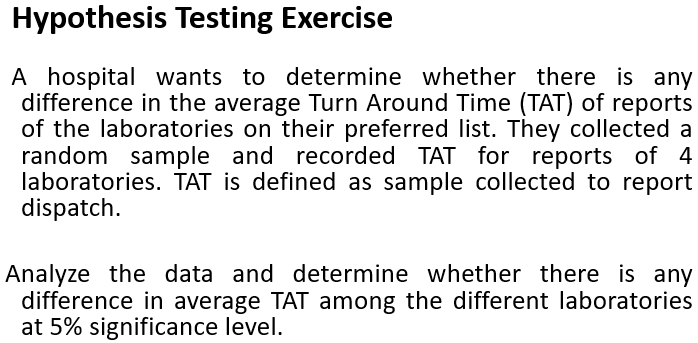

In [2]:
ImageGrab.grabclipboard()

### We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data

##### We need to check whether the mean of any of these samples are different or the same?

#### Setp 1
Make two Hypothesis one contradicting to other

Null Hypothesis is want we want to prove

+ **Null Hypothesis:** $\mu_1 = \mu_2 = \mu_3 = \mu_4$
+ **Alternative Hypthosis:** Atleast One of them is Differente



### Step 2
Decide a cut-off value

+ **Significance 5%**
+ **alpha:** 0.05


### Step 3
Collect evidence

Importing Files

In [3]:
df = pd.read_csv('data/LabTAT.csv')

#### Applying Descriptive Statistics

In [4]:
df.head(10)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
5,179.45,197.00,181.51,161.12
6,191.37,166.36,214.21,154.02
7,166.81,169.60,183.43,163.25
8,158.81,175.36,191.60,152.79
9,165.88,198.68,208.43,161.98


In [5]:
df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


#### Checking the info of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


#### Checking null values

In [7]:
df.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

#### Checking for Duplicate Values

In [8]:
df[df.duplicated()].shape

(0, 4)

#### Plotting the data

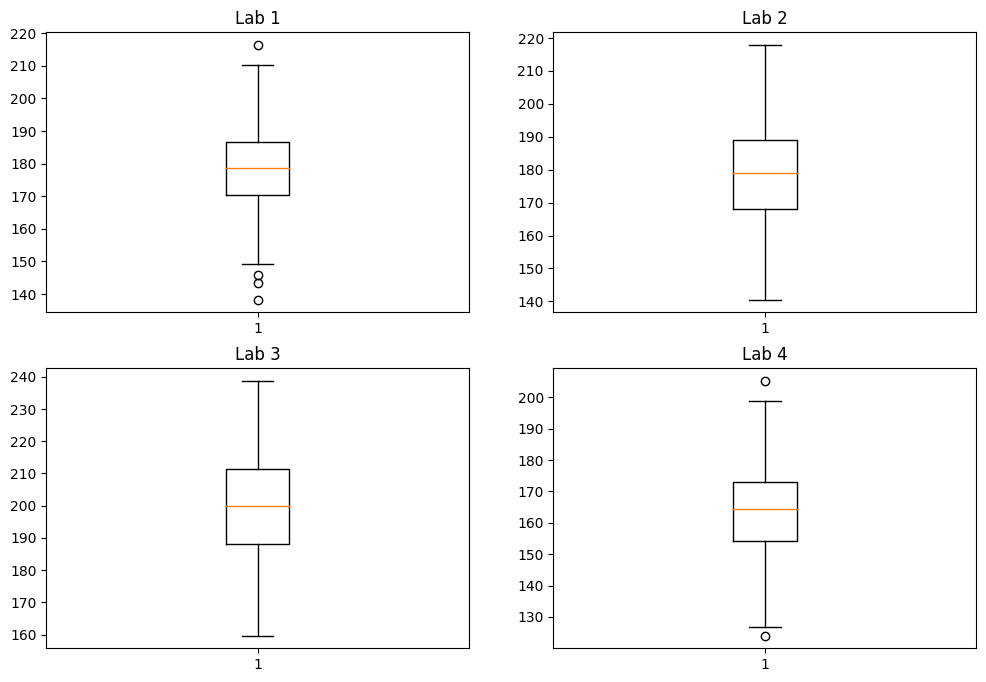

In [9]:
plt.subplots(figsize=(12,8))
plt.subplot(221)
plt.boxplot(df['Laboratory 1'])
plt.title('Lab 1')
plt.subplot(222)
plt.boxplot(df['Laboratory 2'])
plt.title('Lab 2')
plt.subplot(223)
plt.boxplot(df['Laboratory 3'])
plt.title('Lab 3')
plt.subplot(224)
plt.boxplot(df['Laboratory 4'])
plt.title('Lab 4')
plt.show()

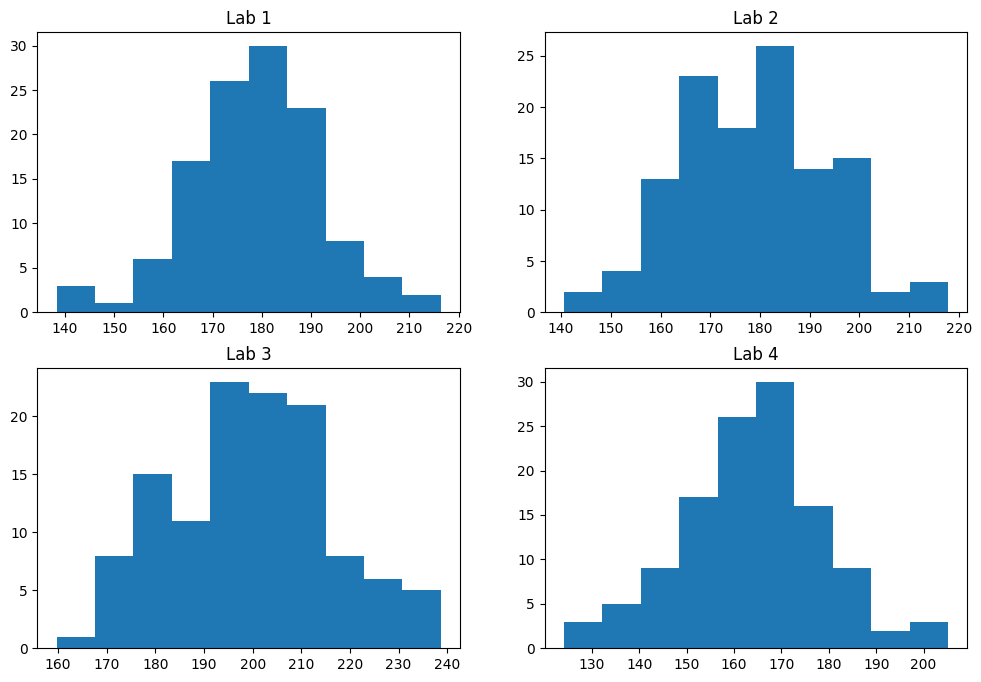

In [10]:
plt.subplots(figsize = (12,8))
plt.subplot(221)
plt.hist(df['Laboratory 1'])
plt.title('Lab 1')
plt.subplot(222)
plt.hist(df['Laboratory 2'])
plt.title('Lab 2')
plt.subplot(223)
plt.hist(df['Laboratory 3'])
plt.title('Lab 3')
plt.subplot(224)
plt.hist(df['Laboratory 4'])
plt.title('Lab 4')
plt.show()

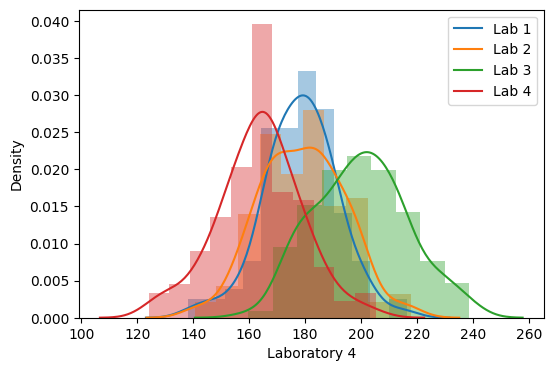

In [11]:
plt.figure(figsize=(6,4))
labels = ['Lab 1','Lab 2','Lab 3','Lab 4']
sns.distplot(df['Laboratory 1'], kde = True)
sns.distplot(df['Laboratory 2'], hist = True)
sns.distplot(df['Laboratory 3'], hist = True)
sns.distplot(df['Laboratory 4'], hist = True)
plt.legend(labels)
plt.show()

#### Plotting Q-Q plot to check whether the distribution follows normal distribution or not

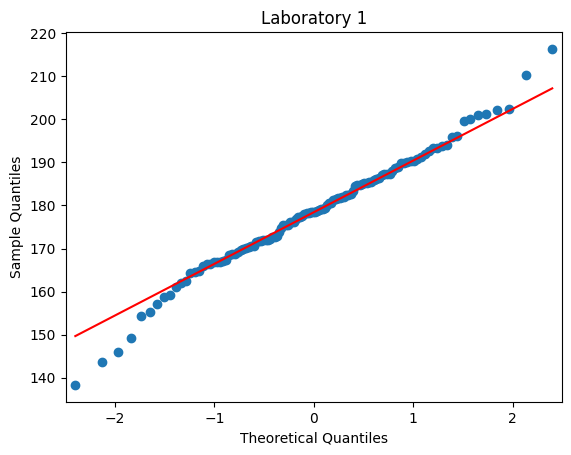

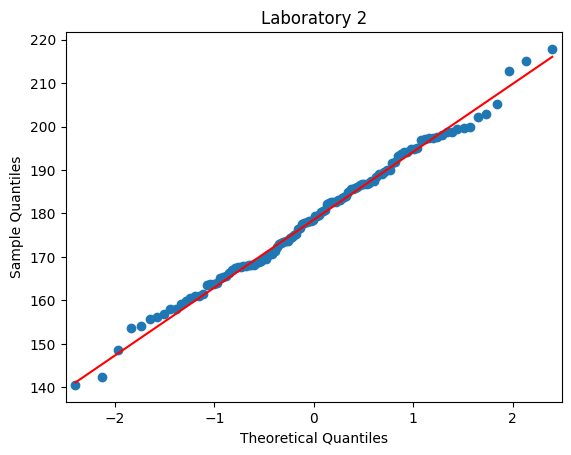

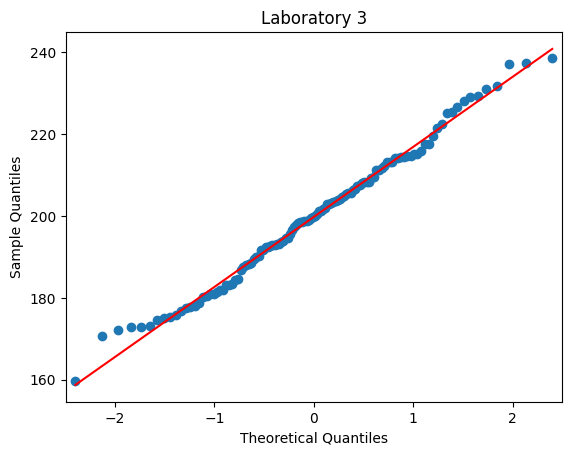

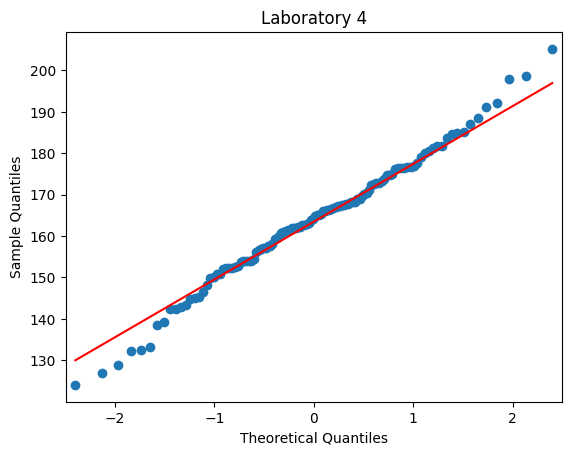

In [12]:
sm.qqplot(df['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(df['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(df['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(df['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

### Step 4
#### Compare Evidences with Hypothesis using t-statictic

In [13]:
t_statistic , p_value = stats.f_oneway(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],df.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


#### Compare p_value with '$\alpha$ '(Significane Level)
##### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
##### If p_value is = '$\alpha$ ' we reject Null Hypothesis

#### interpreting p-value

In [14]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


### Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples